# User chunk

| Cột              | Giữ / Loại bỏ       | Lý do                                                                                                               |
| ---------------- | ------------------- | ------------------------------------------------------------------------------------------------------------------- |
| `customer_id`, `user_id`    | ✅ Giữ| các biến định danh, không mang ý nghĩa thống kê trong phân tích dữ liệu. Nhưng  có thể giữ lại để liên kết với purchase chunk và item chunk|
| `gender`         | ✅ Giữ               | Có thể ảnh hưởng đến hành vi mua hàng                                                                               |
| `location`       | ✅ Giữ               | Thể hiện mã khu vực – hữu ích trong phân tích địa lý                                                                |
| `province`       | ✅ Giữ               | Dùng phân tích xu hướng theo địa phương                                                                             |
| `region`         | ✅ Giữ               | Cung cấp thông tin phân cấp cao hơn, có thể hữu ích trong mô hình                                                   |
| `membership`     | ✅ Giữ               | Ảnh hưởng lớn đến hành vi và giá trị khách hàng                                                                     |
| `sync_status_id` | ❌ Loại bỏ           | Gần như toàn bộ giá trị Null, phần còn lại đều bằng 2 → không có giá trị phân biệt                                  |
| `location_name`  | ❌ Loại bỏ           | Dữ liệu quá chi tiết, rời rạc và không khái quát được                                                               |
| `install_app`    | ✅ Giữ               | Kênh cài đặt có thể ảnh hưởng đến tần suất mua hàng                                                                 |
| `district`       | ⚙️ Giữ có điều kiện | Có thể giữ nếu cần phân tích chi tiết theo khu vực; nếu không, loại bỏ do trùng lặp thông tin địa lý với `province` |
| `is_deleted`     | ❌ Loại bỏ           | Toàn bộ là `False`, không mang thông tin                                                                            |


In [3]:
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
def read_parquet_by_type(train_path: str):
    # Lấy tất cả các file parquet trong thư mục
    files = [os.path.join(train_path, f) for f in os.listdir(train_path) if f.endswith('.parquet')]
    
    # Phân loại các file theo loại tên
    user_chunk_files = [file for file in files if 'user_chunk' in file]
    purchase_history_chunk_files = [file for file in files if 'purchase_history_daily_chunk' in file]
    item_chunk_files = [file for file in files if 'item_chunk' in file]
    
    # Đọc các file riêng biệt thành DataFrame
    user_chunk_df = pl.concat([pl.read_parquet(file) for file in user_chunk_files]) if user_chunk_files else None
    purchase_history_chunk_df = pl.concat([pl.read_parquet(file) for file in purchase_history_chunk_files]) if purchase_history_chunk_files else None
    item_chunk_df = pl.concat([pl.read_parquet(file) for file in item_chunk_files]) if item_chunk_files else None
    
    # Trả về một dictionary chứa các DataFrame
    return {
        "user_chunk": user_chunk_df,
        "purchase_history_chunk": purchase_history_chunk_df,
        "item_chunk": item_chunk_df
    }

In [5]:
train_path = 'E:\KHMT2023_CS_UIT/05_C_Python_For_ML/recommendation_dataset'
dataframes = read_parquet_by_type(train_path)

df_user = dataframes["user_chunk"]
df_purchase = dataframes["purchase_history_chunk"]
df_item = dataframes["item_chunk"]

In [6]:
cols_to_keep_user = [
    'customer_id', 'user_id', 'gender', 'location', 'province',
    'region', 'membership', 'install_app'
]

df_user = df_user.select(cols_to_keep_user)

print("User Chunk DataFrame:")
df_user.head()

User Chunk DataFrame:


customer_id,user_id,gender,location,province,region,membership,install_app
i32,str,str,i32,str,str,str,str
14732,"""e1e48206652bf8c279ff0206c69a80…","""Nam""",155,"""Hồ Chí Minh""","""Đông Nam Bộ""","""Standard""","""In-Store"""
15126,"""77891759204bd27e69fb11a7b92889…","""Nữ""",300,"""Hồ Chí Minh""","""Đông Nam Bộ""","""Standard""","""In-Store"""
29718,"""b8041b584a0bb6655361727a0a6108…","""Nữ""",157,"""Bến Tre""","""Đồng bằng sông Cửu Long""","""Standard""","""In-Store"""
30077,"""c52ceaca44a83ec41a219cfaff0e05…","""Nữ""",53,"""Hồ Chí Minh""","""Đông Nam Bộ""","""Standard""","""In-Store"""
30085,"""74ac5764f5d67d341aacf238d7762f…","""Nữ""",660,"""Hồ Chí Minh""","""Đông Nam Bộ""","""Standard""","""In-Store"""


# Purchase chunk

| Cột            | Giữ / Loại bỏ | Lý do                                                                                                                                             |
| -------------- | ------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| `timestamp`    | ✅ Giữ         | Biểu diễn thời gian giao dịch, có thể phân tích xu hướng theo thời gian; cần chuyển từ UNIX timestamp sang dạng datetime để thuận tiện phân tích. |
| `user_id`      | ✅ Giữ         | Biến định danh người dùng, cần để liên kết với bảng `User Chunk`; không có ý nghĩa thống kê độc lập nhưng quan trọng cho join dữ liệu.            |
| `item_id`      | ✅ Giữ         | Dùng để xác định sản phẩm và phân tích tần suất, mức độ phổ biến của mặt hàng.                                                                    |
| `event_type`   | ❌ Loại bỏ     | Toàn bộ dữ liệu chỉ có giá trị “Purchase” → không mang thông tin phân biệt.                                                                       |
| `event_value`  | ❌ Loại bỏ     | Tương quan hoàn hảo với `quantity` (r = 1.0) → gây multicollinearity, nên giữ `quantity`.                                                         |
| `price`        | ✅ Giữ         | Biến quan trọng để phân tích doanh thu, hành vi giá và khuyến mãi; cần xử lý outlier (trimming hoặc winsorizing).                                 |
| `quantity`     | ✅ Giữ         | Thể hiện số lượng mua; cần xử lý outlier (giá trị quá lớn có thể là đơn hàng sỉ hoặc lỗi).                                                        |
| `date_key`     | ❌ Loại bỏ     | Tương quan gần tuyệt đối với `timestamp` (r ≈ 0.998) → dư thừa thông tin thời gian.                                                               |
| `customer_id`  | ✅ Giữ         | Biến định danh khách hàng, cần để liên kết với bảng `User Chunk`.                                                                                 |
| `created_date` | ✅ Giữ         | Thời điểm tạo đơn hàng, có thể khác thời điểm mua (timestamp); hữu ích trong phân tích hành vi và vận hành.                                       |
| `payment`      | ✅ Giữ         | Thông tin phương thức thanh toán (cash, transfer, v.v.) → quan trọng trong phân tích kênh thanh toán và hành vi người dùng.                       |
| `location`     | ✅ Giữ         | Cho phép phân tích xu hướng mua hàng theo khu vực; không có outlier.                                                                              |
| `discount`     | ✅ Giữ         | Thể hiện mức chiết khấu; cần chuẩn hóa hoặc winsorize do phân bố lệch và nhiều outlier.                                                           |
| `channel`      | ✅ Giữ         | Phân biệt kênh bán hàng (In-Store, Chat, CRM, v.v.), có mối liên hệ mạnh với `payment` → hữu ích trong phân tích hành vi.                         |
| `is_deleted`   | ❌ Loại bỏ     | Toàn bộ giá trị là `False` → không mang thông tin phân biệt.                                                                                      |


🔍 Thông tin ban đầu:
(35729825, 16)
['timestamp', 'user_id', 'item_id', 'event_type', 'event_value', 'price', 'date_key', 'quantity', 'customer_id', 'created_date', 'updated_date', 'channel', 'payment', 'location', 'discount', 'is_deleted']

Số lượng Null mỗi cột:
shape: (1, 16)
┌───────────┬─────────┬─────────┬────────────┬───┬─────────┬──────────┬──────────┬────────────┐
│ timestamp ┆ user_id ┆ item_id ┆ event_type ┆ … ┆ payment ┆ location ┆ discount ┆ is_deleted │
│ ---       ┆ ---     ┆ ---     ┆ ---        ┆   ┆ ---     ┆ ---      ┆ ---      ┆ ---        │
│ u32       ┆ u32     ┆ u32     ┆ u32        ┆   ┆ u32     ┆ u32      ┆ u32      ┆ u32        │
╞═══════════╪═════════╪═════════╪════════════╪═══╪═════════╪══════════╪══════════╪════════════╡
│ 0         ┆ 0       ┆ 0       ┆ 0          ┆ … ┆ 0       ┆ 0        ┆ 0        ┆ 0          │
└───────────┴─────────┴─────────┴────────────┴───┴─────────┴──────────┴──────────┴────────────┘


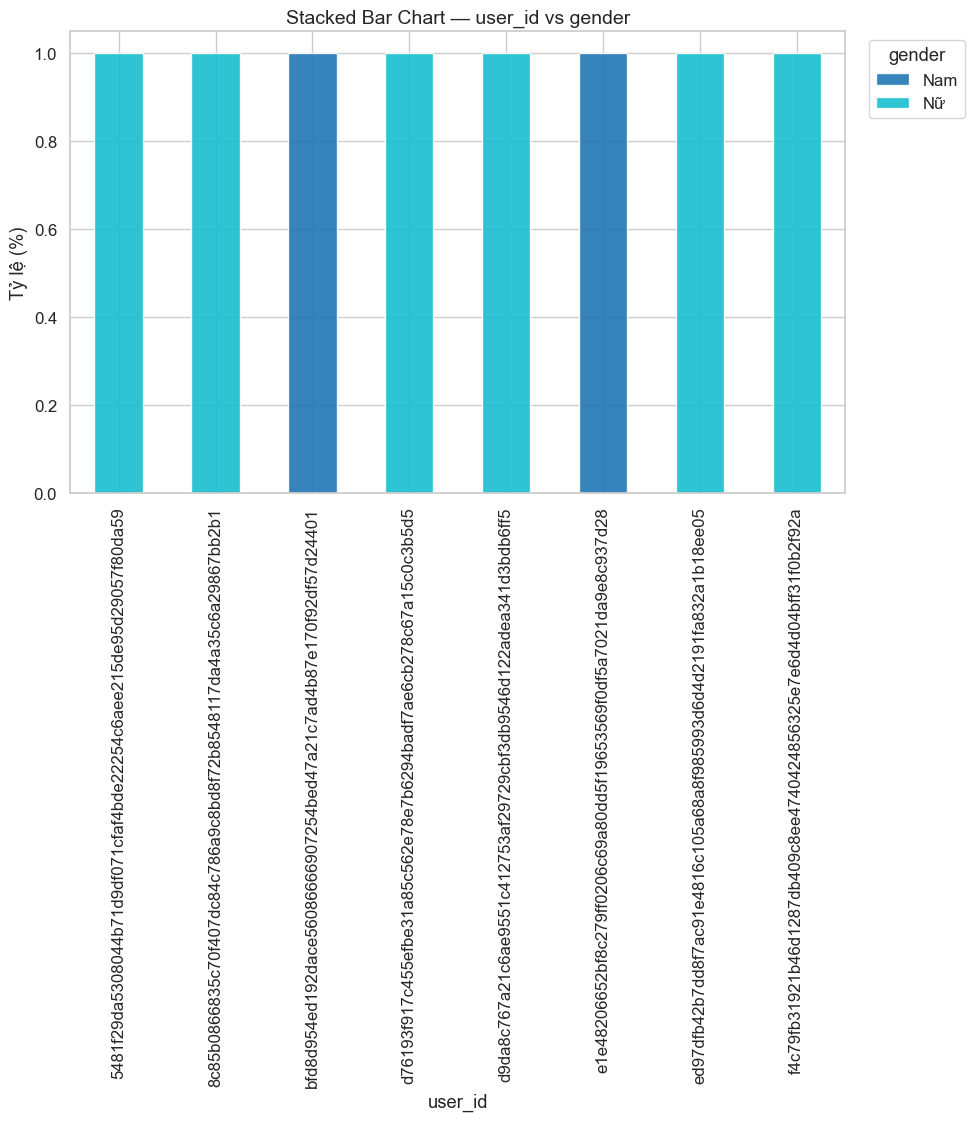

C:\Users\huynh\AppData\Local\Temp\ipykernel_30320\3431420728.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


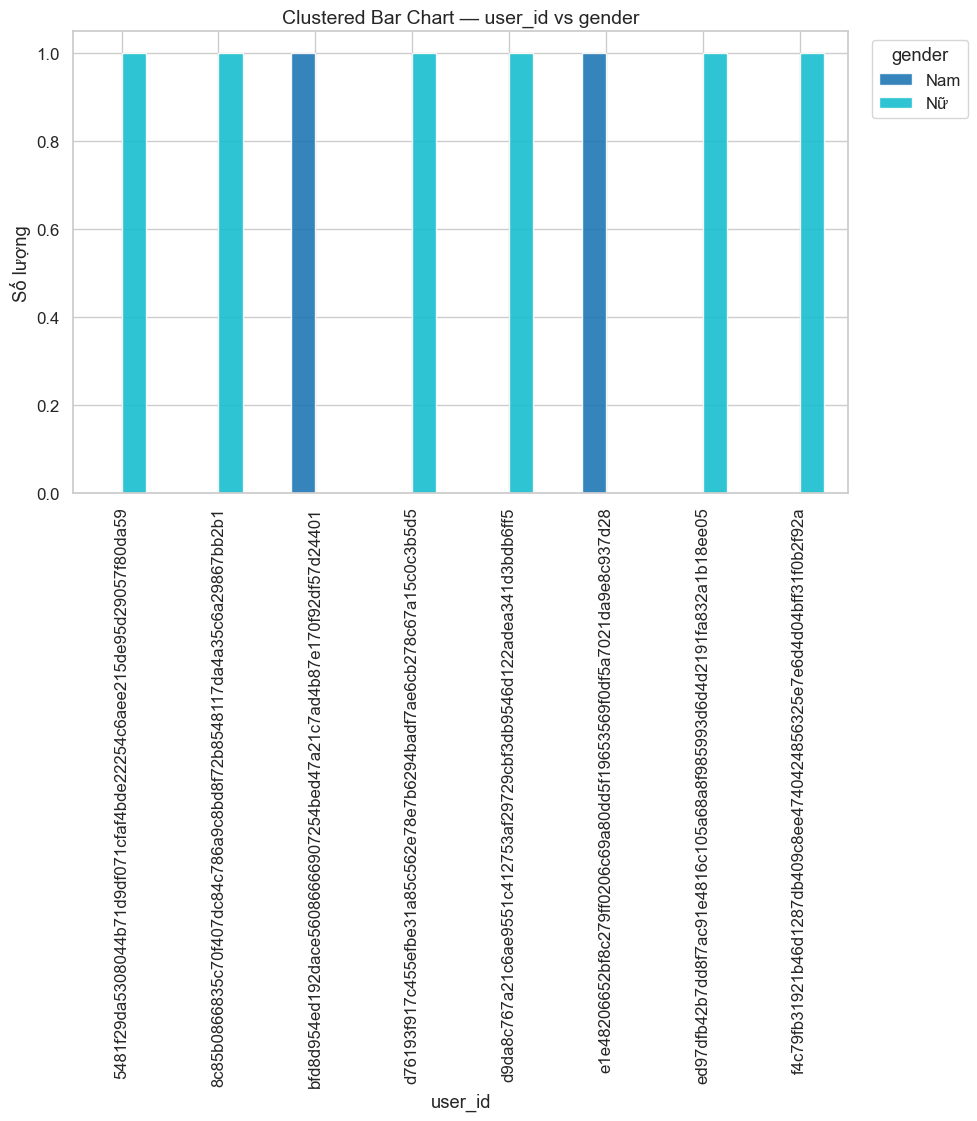


📊 Phân tích cặp (user_id, province)
────────────────────────────
🔹 Bảng tần suất:
province                                            Hồ Chí Minh  Đà Nẵng
user_id                                                                 
5481f29da5308044b71d9df071cfaf4bde22254c6aee215...            1        0
bfd8d954ed192dace56086666907254bed47a21c7ad4b87...            0        1
e1e48206652bf8c279ff0206c69a80dd5f19653569f0df5...            1        0
ed97dfb42b7dd8f7ac91e4816c105a68a8f985993d6d4d2...            1        0

🔹 Chi-square = 4.000, p = 2.6146e-01, dof = 3
➡️ Kết luận: Không tìm thấy mối liên hệ đáng kể.


C:\Users\huynh\AppData\Local\Temp\ipykernel_30320\3431420728.py:66: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


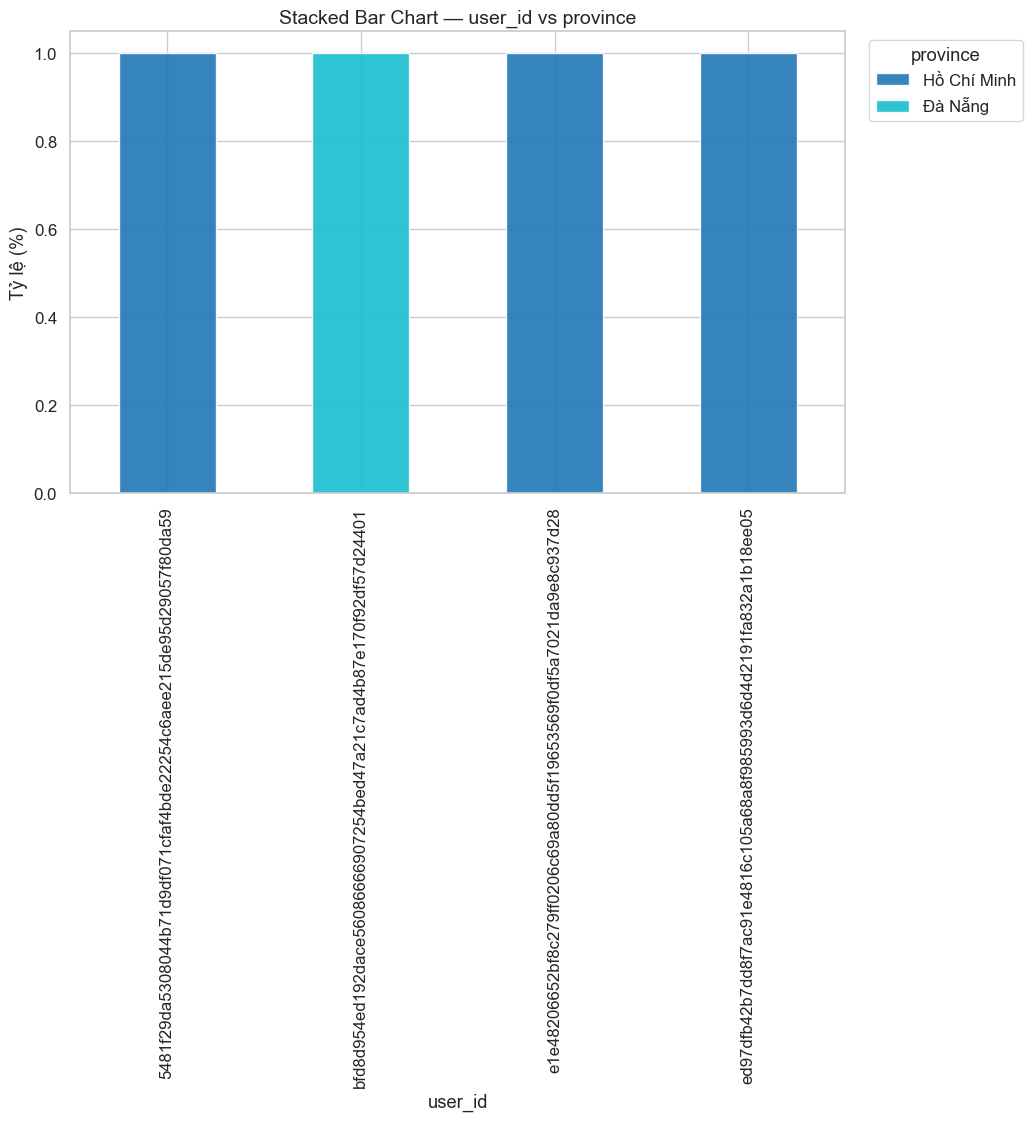

C:\Users\huynh\AppData\Local\Temp\ipykernel_30320\3431420728.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


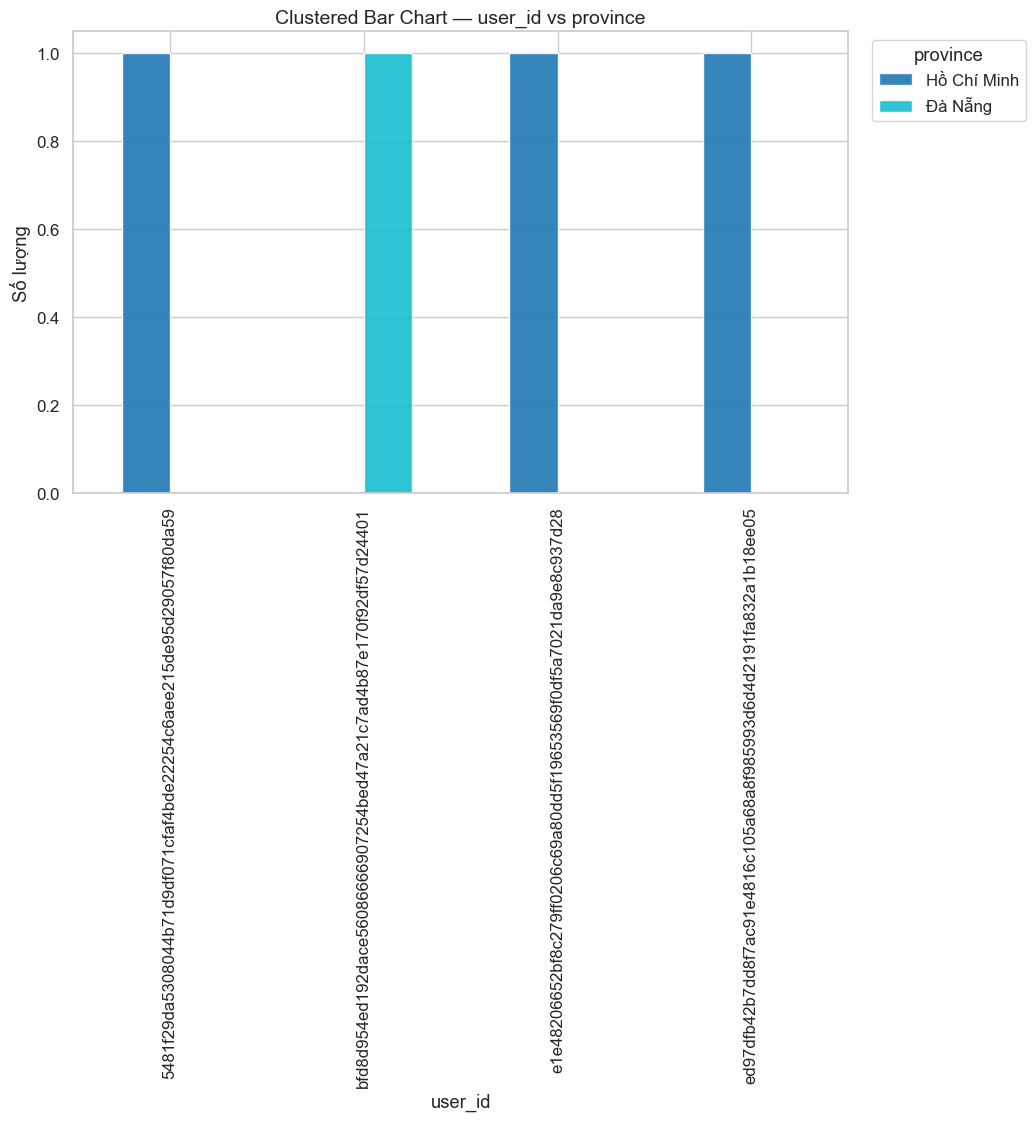


📊 Phân tích cặp (user_id, region)
────────────────────────────
🔹 Bảng tần suất:
region                                              Duyên hải Nam Trung Bộ  \
user_id                                                                      
5481f29da5308044b71d9df071cfaf4bde22254c6aee215...                       0   
8c85b0866835c70f407dc84c786a9c8bd8f72b8548117da...                       0   
bfd8d954ed192dace56086666907254bed47a21c7ad4b87...                       1   
d76193f917c455efbe31a85c562e78e7b6294badf7ae6cb...                       0   
d9da8c767a21c6ae9551c412753af29729cbf3db9546d12...                       0   
e1e48206652bf8c279ff0206c69a80dd5f19653569f0df5...                       0   
ed97dfb42b7dd8f7ac91e4816c105a68a8f985993d6d4d2...                       0   
f4c79fb31921b46d1287db409c8ee4740424856325e7e6d...                       0   

region                                              Đông Nam Bộ  \
user_id                                                           
5481

C:\Users\huynh\AppData\Local\Temp\ipykernel_30320\3431420728.py:66: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


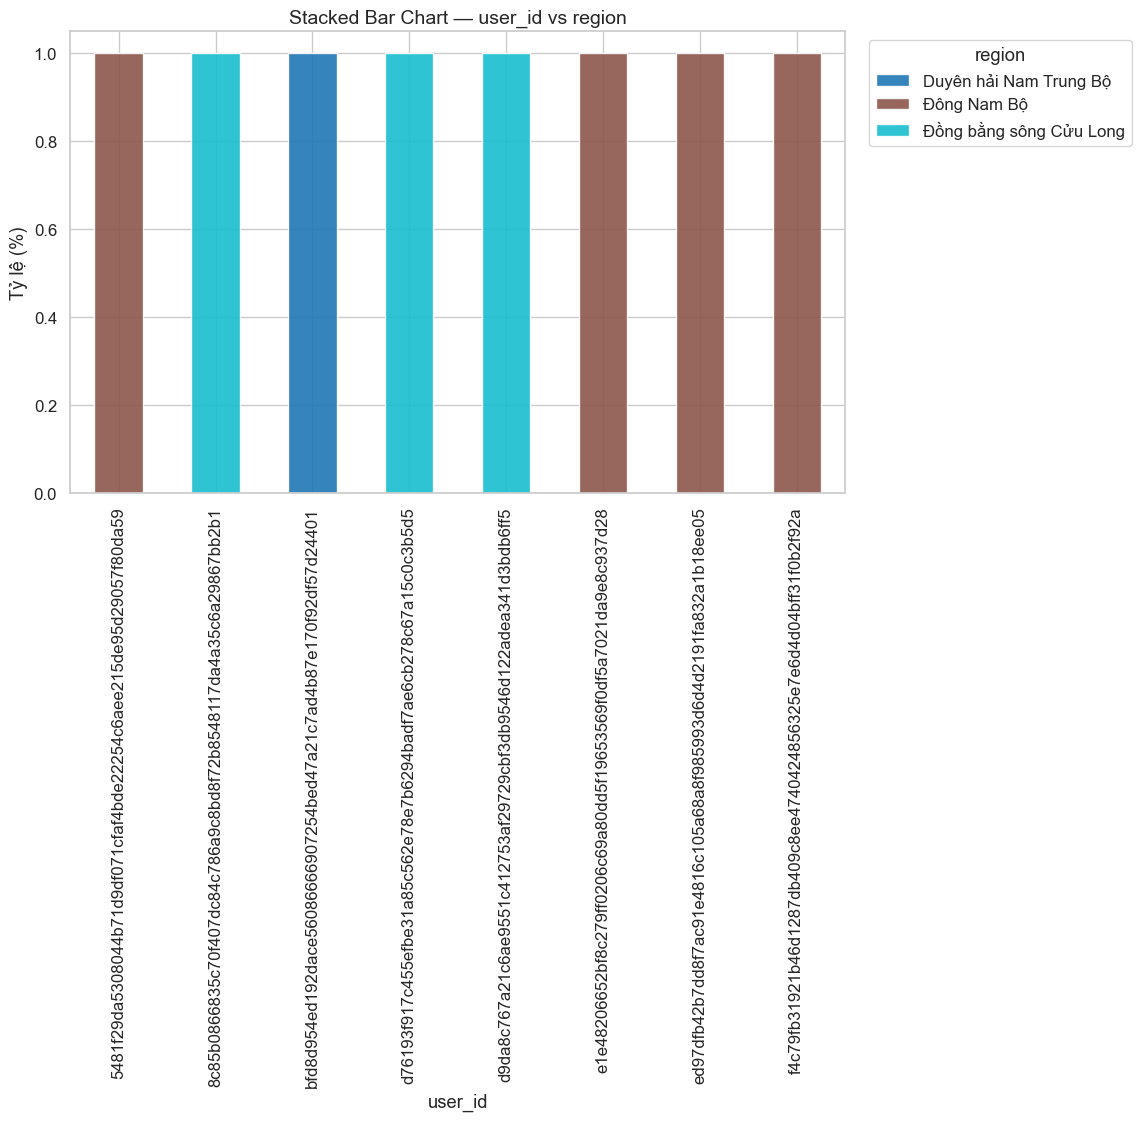

C:\Users\huynh\AppData\Local\Temp\ipykernel_30320\3431420728.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


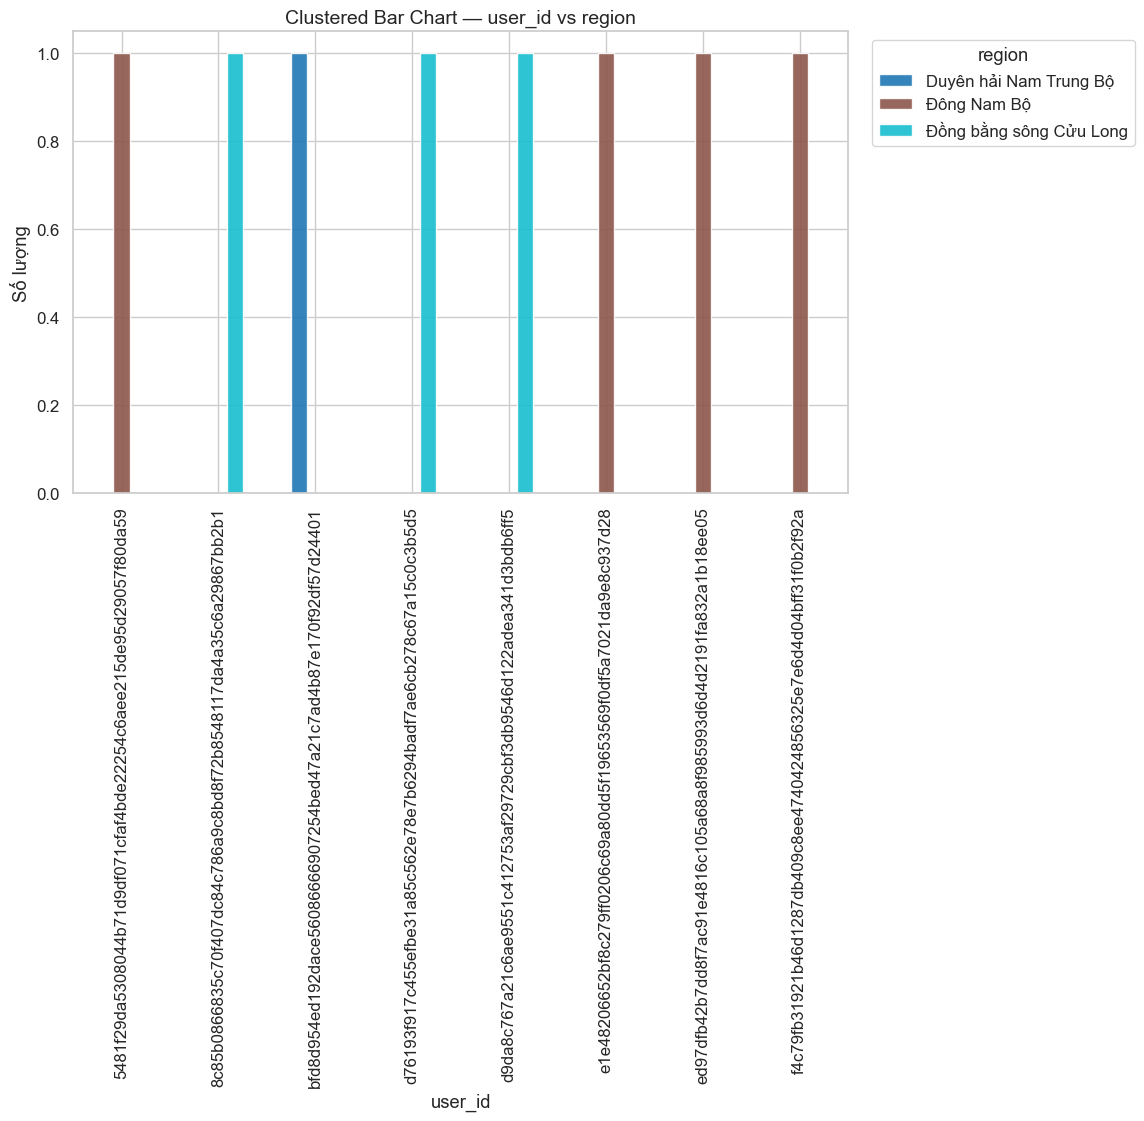


📊 Phân tích cặp (user_id, membership)
────────────────────────────
🔹 Bảng tần suất:
membership                                          Standard
user_id                                                     
5481f29da5308044b71d9df071cfaf4bde22254c6aee215...         1
8c85b0866835c70f407dc84c786a9c8bd8f72b8548117da...         1
bfd8d954ed192dace56086666907254bed47a21c7ad4b87...         1
d76193f917c455efbe31a85c562e78e7b6294badf7ae6cb...         1
d9da8c767a21c6ae9551c412753af29729cbf3db9546d12...         1
e1e48206652bf8c279ff0206c69a80dd5f19653569f0df5...         1
ed97dfb42b7dd8f7ac91e4816c105a68a8f985993d6d4d2...         1
f4c79fb31921b46d1287db409c8ee4740424856325e7e6d...         1

🔹 Chi-square = 0.000, p = 1.0000e+00, dof = 0
➡️ Kết luận: Không tìm thấy mối liên hệ đáng kể.


C:\Users\huynh\AppData\Local\Temp\ipykernel_30320\3431420728.py:66: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


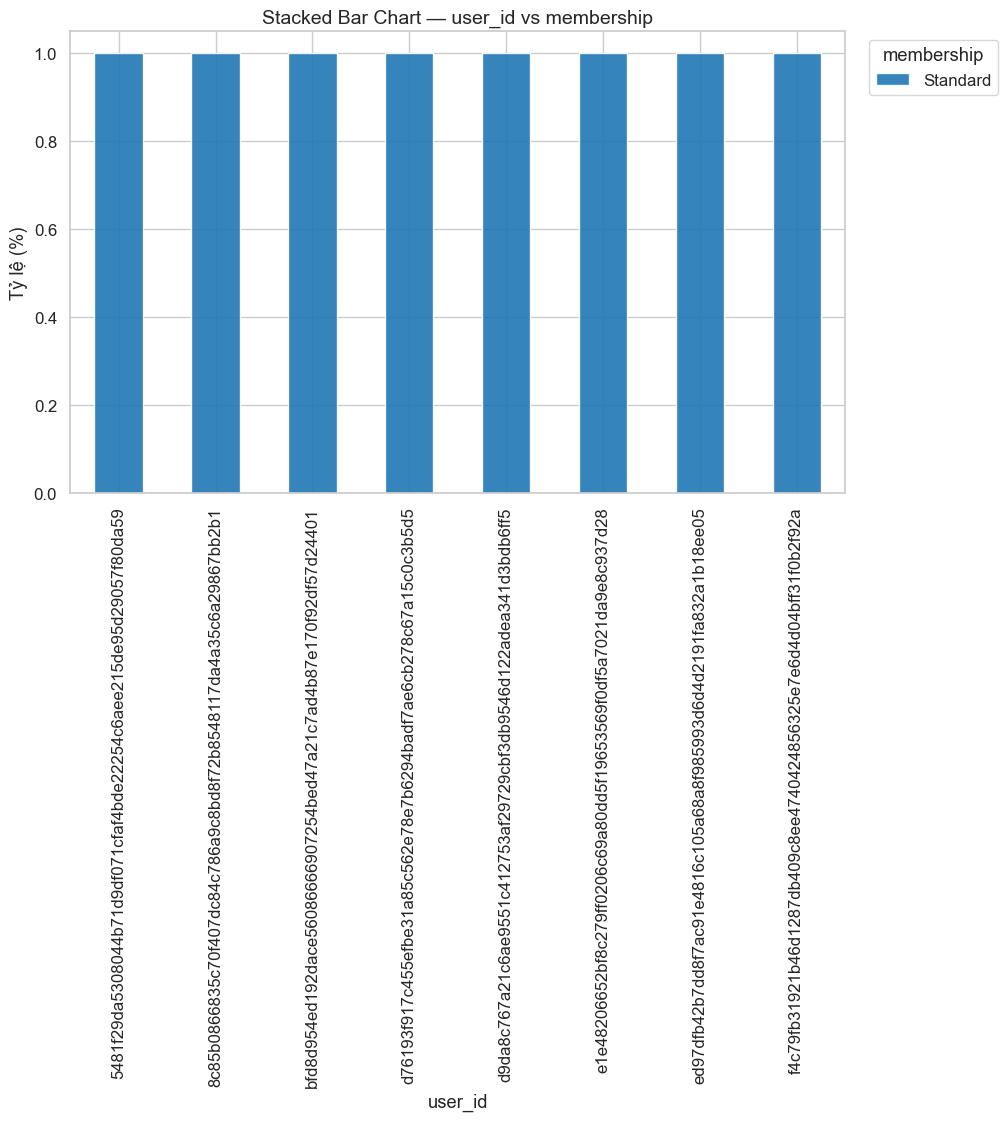

C:\Users\huynh\AppData\Local\Temp\ipykernel_30320\3431420728.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


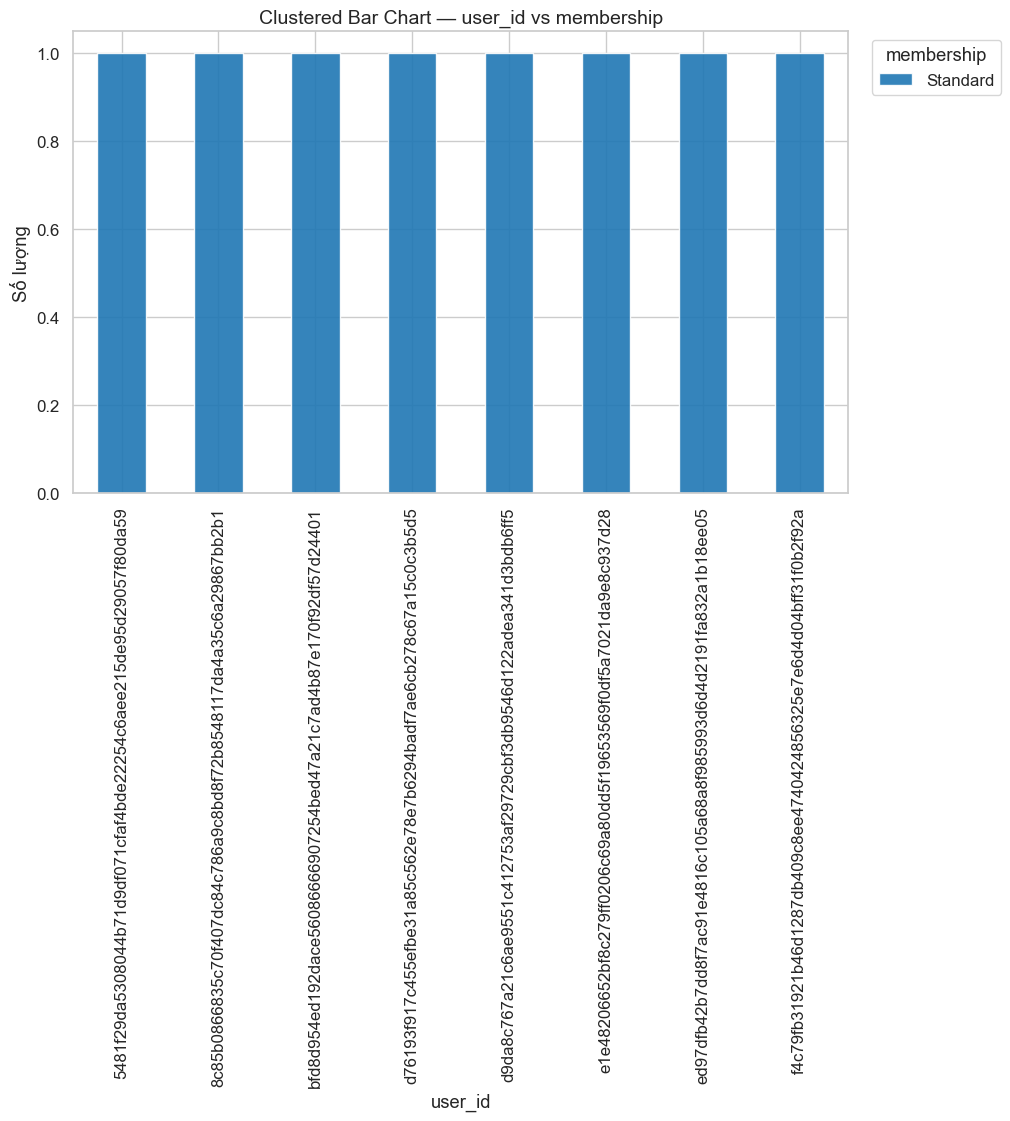


📊 Phân tích cặp (user_id, install_app)
────────────────────────────
🔹 Bảng tần suất:
install_app                                         Android  In-Store
user_id                                                              
5481f29da5308044b71d9df071cfaf4bde22254c6aee215...        1         0
8c85b0866835c70f407dc84c786a9c8bd8f72b8548117da...        0         1
bfd8d954ed192dace56086666907254bed47a21c7ad4b87...        0         1
d76193f917c455efbe31a85c562e78e7b6294badf7ae6cb...        0         1
d9da8c767a21c6ae9551c412753af29729cbf3db9546d12...        0         1
e1e48206652bf8c279ff0206c69a80dd5f19653569f0df5...        0         1
ed97dfb42b7dd8f7ac91e4816c105a68a8f985993d6d4d2...        0         1
f4c79fb31921b46d1287db409c8ee4740424856325e7e6d...        0         1

🔹 Chi-square = 8.000, p = 3.3259e-01, dof = 7
➡️ Kết luận: Không tìm thấy mối liên hệ đáng kể.


C:\Users\huynh\AppData\Local\Temp\ipykernel_30320\3431420728.py:66: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


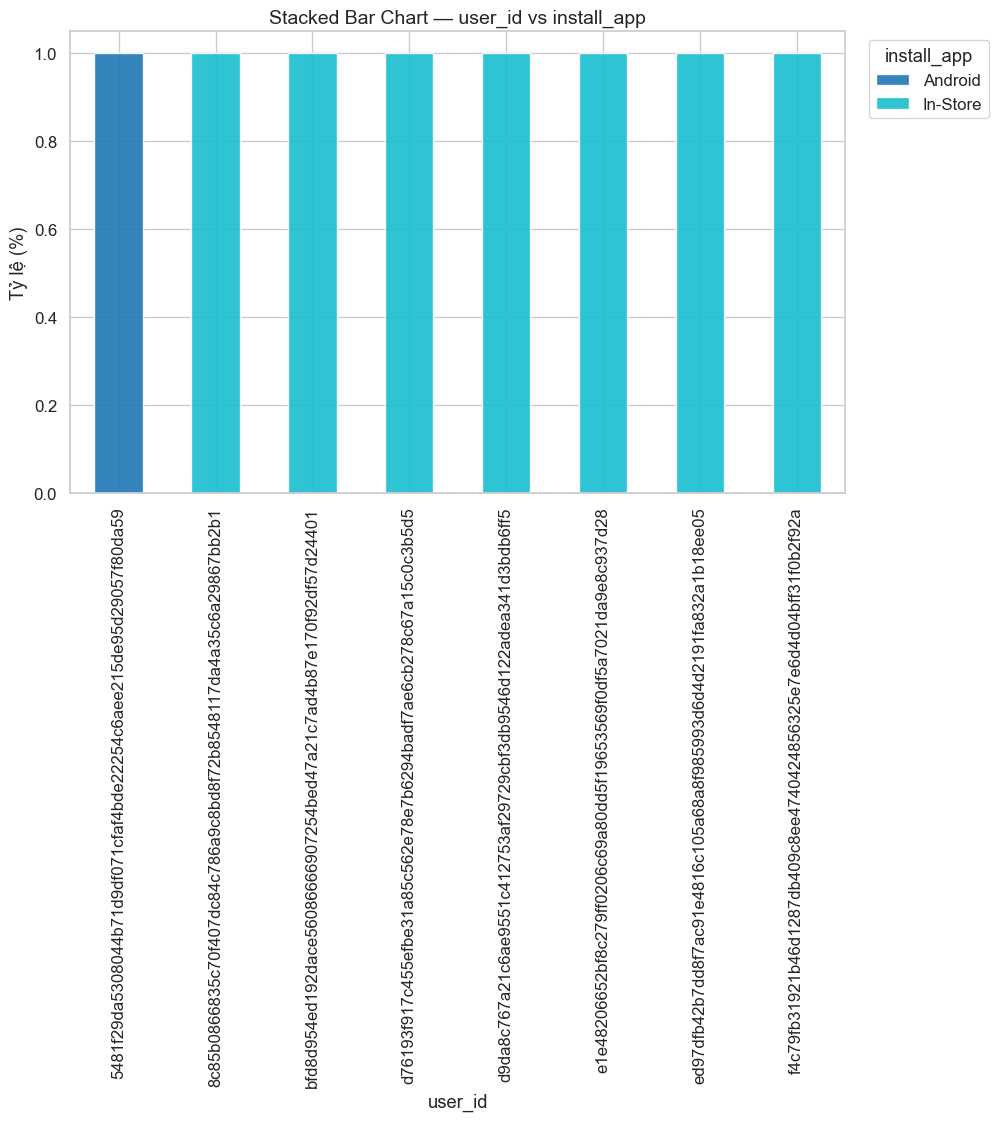

C:\Users\huynh\AppData\Local\Temp\ipykernel_30320\3431420728.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


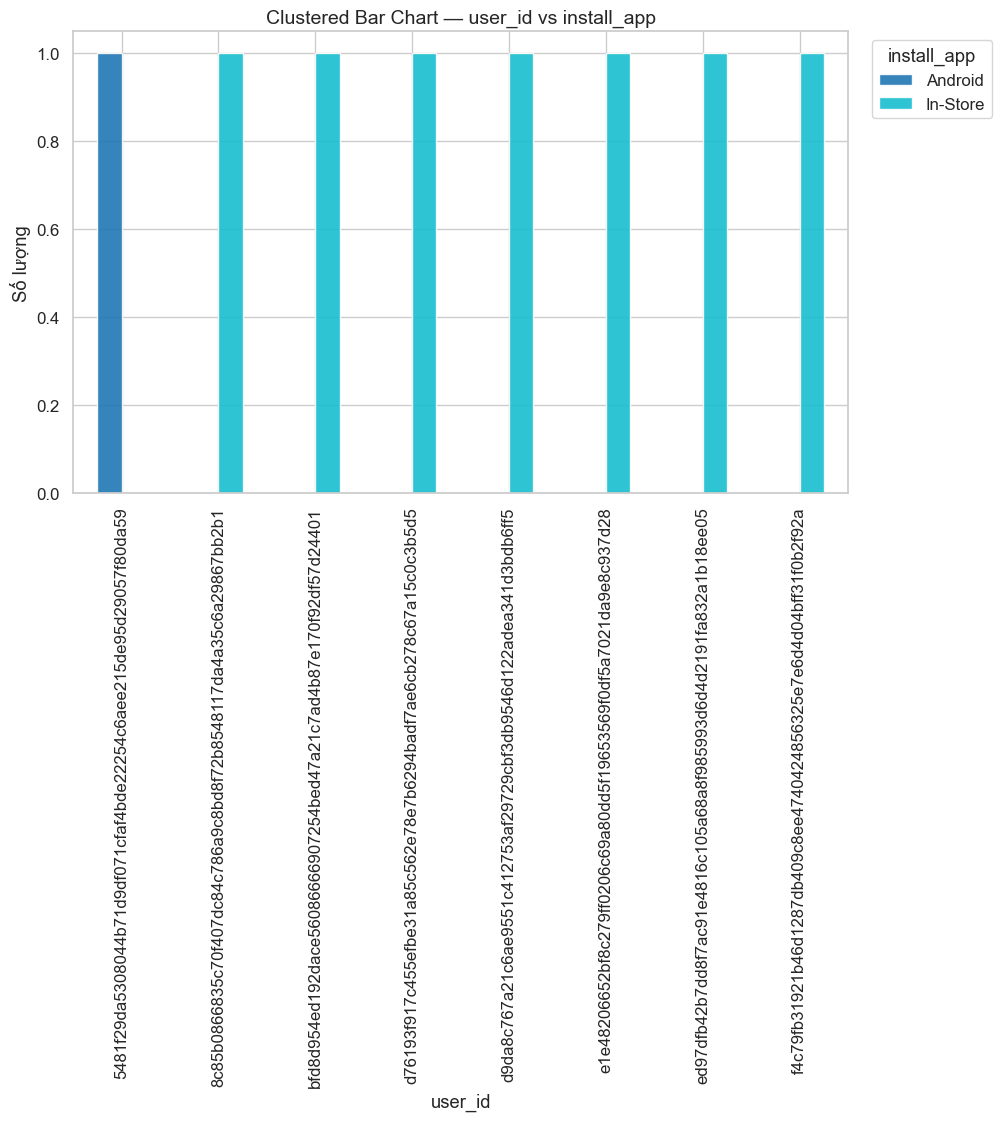


📊 Phân tích cặp (gender, province)
────────────────────────────
🔹 Bảng tần suất:
province  Bà Rịa - Vũng Tàu  Bình Dương  Hà Nội  Hồ Chí Minh  Long An  \
gender                                                                  
Khác                      0           0       0            5        0   
Nam                   29821       81668   25134       302830    41836   
Nữ                    88395      206189  177745       921484    92060   

province  Lâm Đồng  Đà Nẵng  Đồng Nai  
gender                                 
Khác             0        0         0  
Nam          34338    37660     86913  
Nữ          100320   109040    225467  

🔹 Chi-square = 23174.975, p = 0.0000e+00, dof = 14
➡️ Kết luận: Hai biến có mối liên hệ **có ý nghĩa thống kê**.


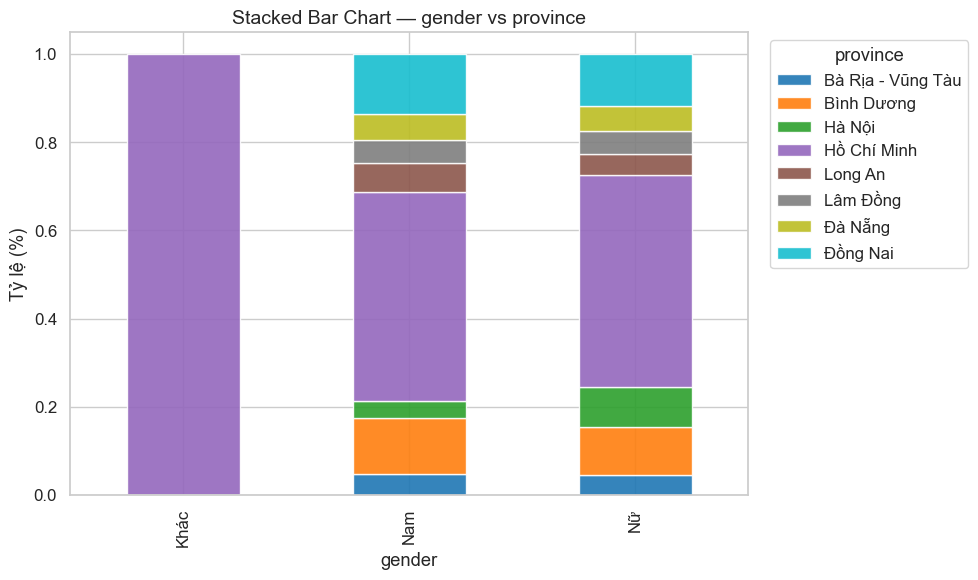

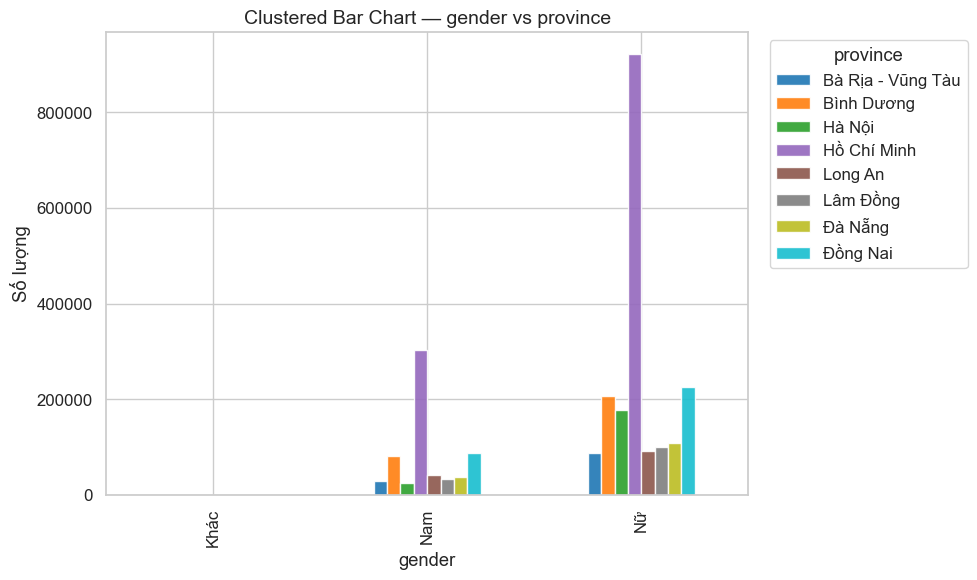


📊 Phân tích cặp (gender, region)
────────────────────────────
🔹 Bảng tần suất:
region  Bắc Trung Bộ  Duyên hải Bắc Bộ  Duyên hải Nam Trung Bộ  \
gender                                                            
Khác                1                 0                       0   
Nam             42780                 7                  147293   
Nữ             175088              4376                  430013   

region  Trung du và miền núi phía Bắc  Tây Nguyên  Đông Nam Bộ  \
gender                                                           
Khác                                0           0            5   
Nam                             18330       84711       552418   
Nữ                              87006      248752      1573643   

region  Đồng bằng sông Hồng  Đồng bằng sông Cửu Long  
gender                                                   
Khác                         0                        2  
Nam                      48403                   255127  
Nữ                   

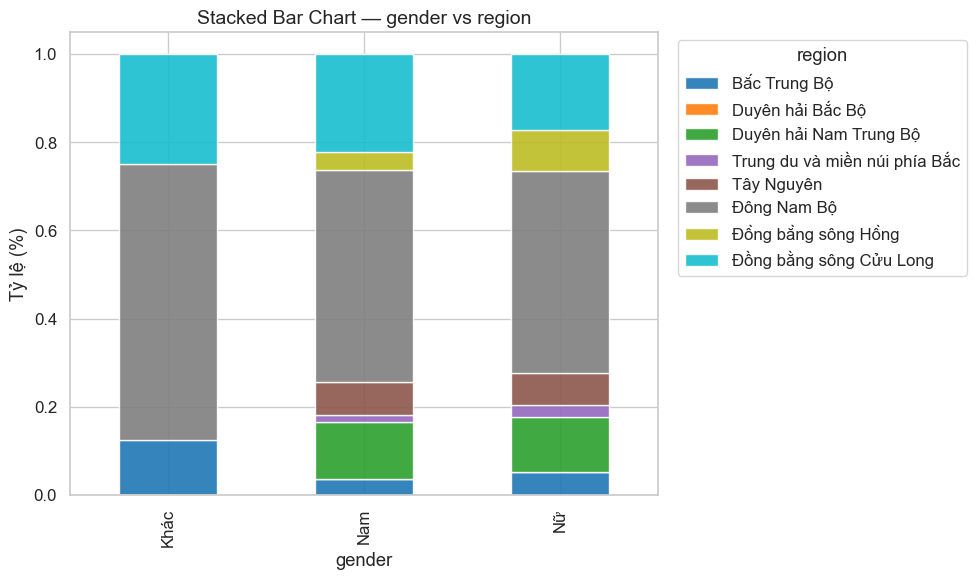

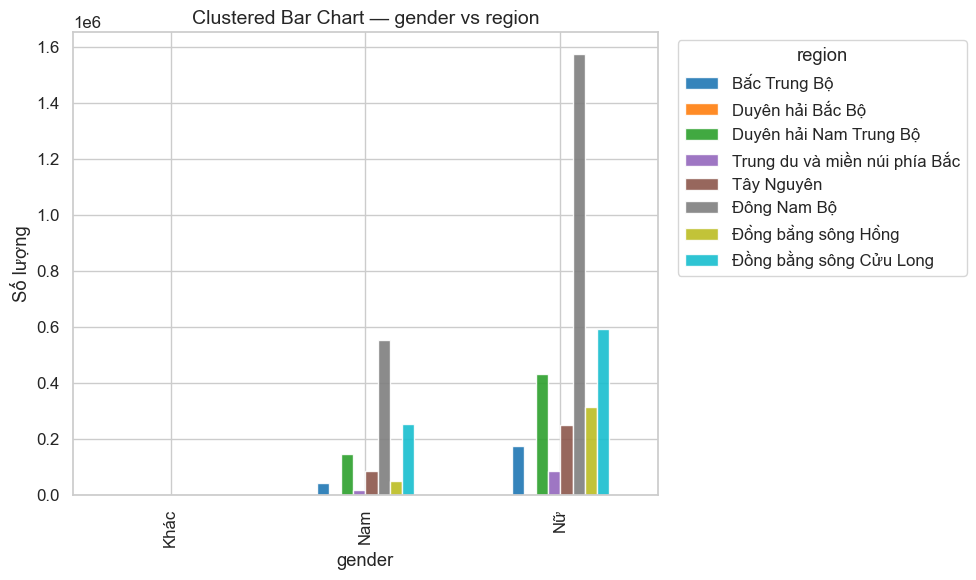


📊 Phân tích cặp (gender, membership)
────────────────────────────
🔹 Bảng tần suất:
membership  Diamond    Gold  Standard
gender                               
Khác              0       0         8
Nam           13388   48904   1086777
Nữ            62457  206269   3156161

🔹 Chi-square = 7609.830, p = 0.0000e+00, dof = 4
➡️ Kết luận: Hai biến có mối liên hệ **có ý nghĩa thống kê**.


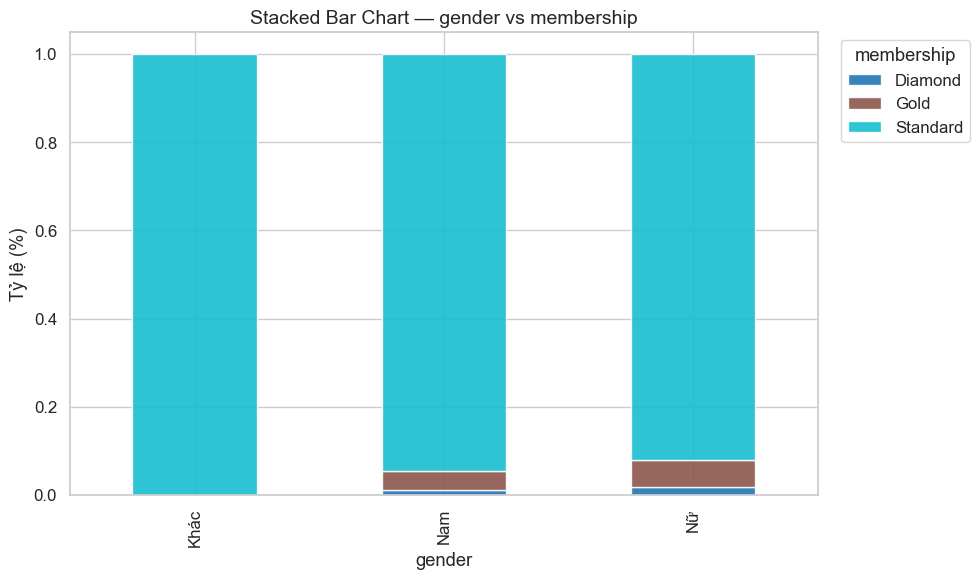

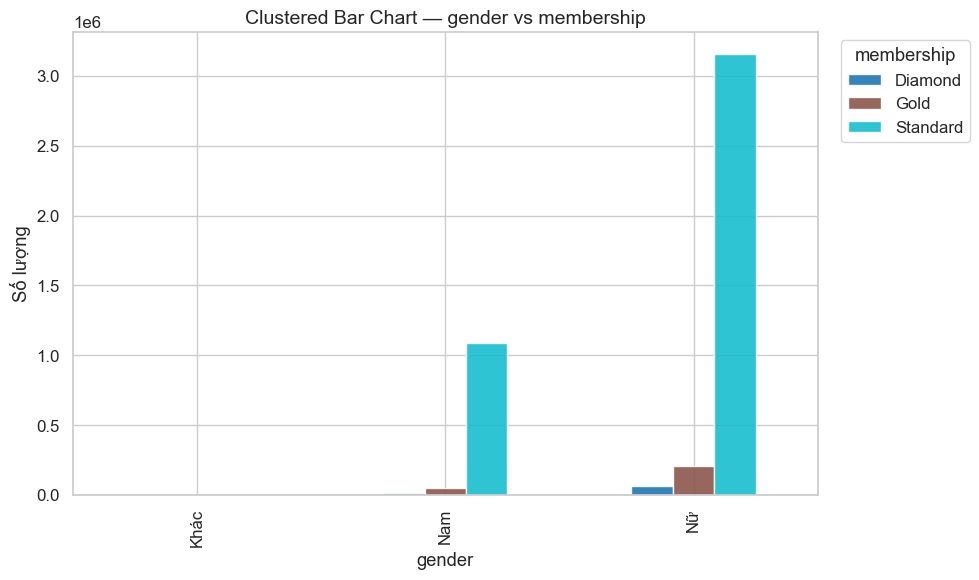


📊 Phân tích cặp (gender, install_app)
────────────────────────────
🔹 Bảng tần suất:
install_app  Android  CRM Partner  Call  Chat  In-Store     SPE    Web     iOS
gender                                                                        
Khác               0            0     0     0         8       0      0       0
Nam              124          844  2421   193   1144992      80    160     240
Nữ             91827        15148  8163  1534   2797000  347828  35716  127642

🔹 Chi-square = 236735.854, p = 0.0000e+00, dof = 14
➡️ Kết luận: Hai biến có mối liên hệ **có ý nghĩa thống kê**.


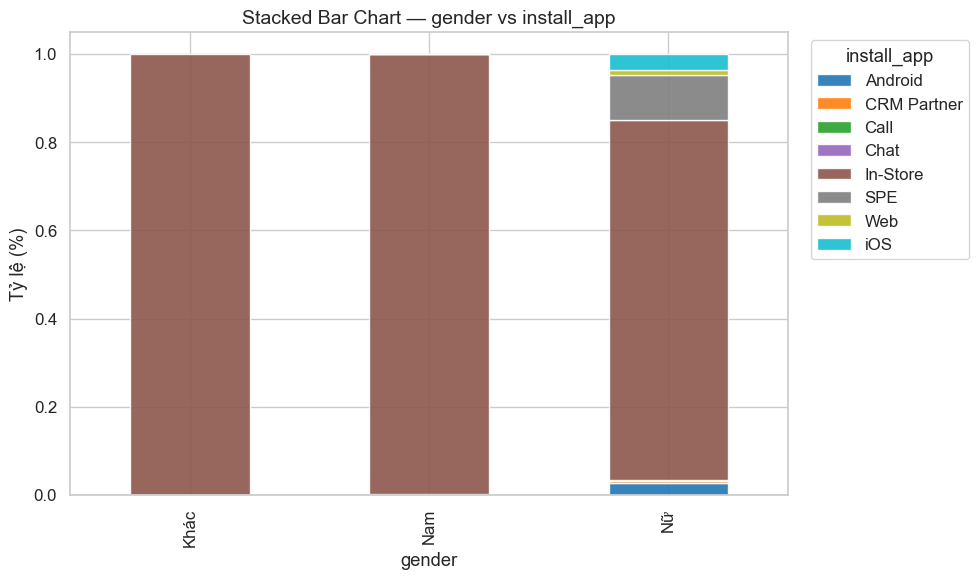

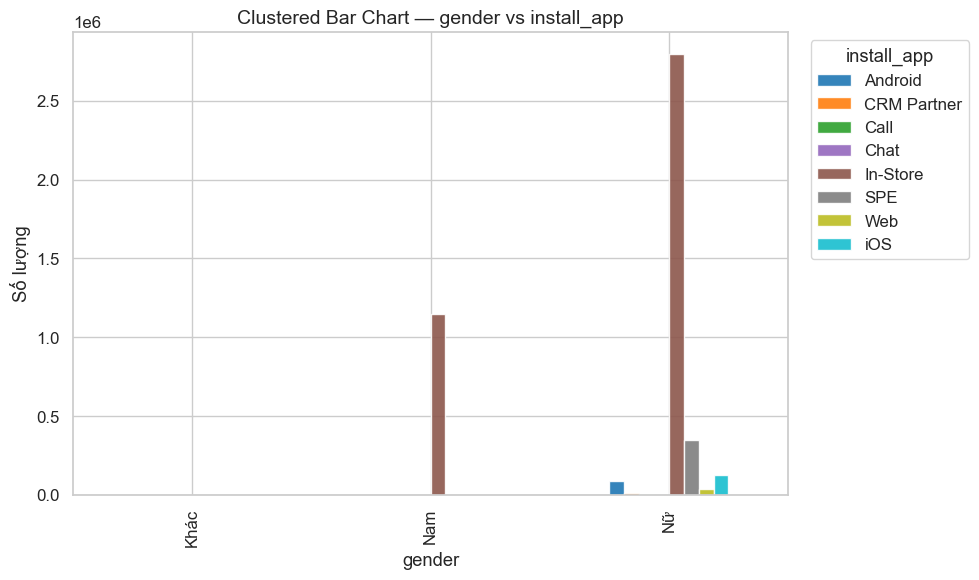


📊 Phân tích cặp (province, region)
────────────────────────────
🔹 Bảng tần suất:
region             Bắc Trung Bộ  Duyên hải Bắc Bộ  Duyên hải Nam Trung Bộ  \
province                                                                     
Bà Rịa - Vũng Tàu              0                 5                       0   
Bình Dương                     0                 0                      20   
Hà Nội                         0                 0                       0   
Hồ Chí Minh                   71                 0                       0   
Long An                        0                 0                       0   
Lâm Đồng                       0                 0                       0   
Đà Nẵng                        0                 0                  146700   
Đồng Nai                       0                 0                       6   

region             Trung du và miền núi phía Bắc  Tây Nguyên  Đông Nam Bộ  \
province                                                    

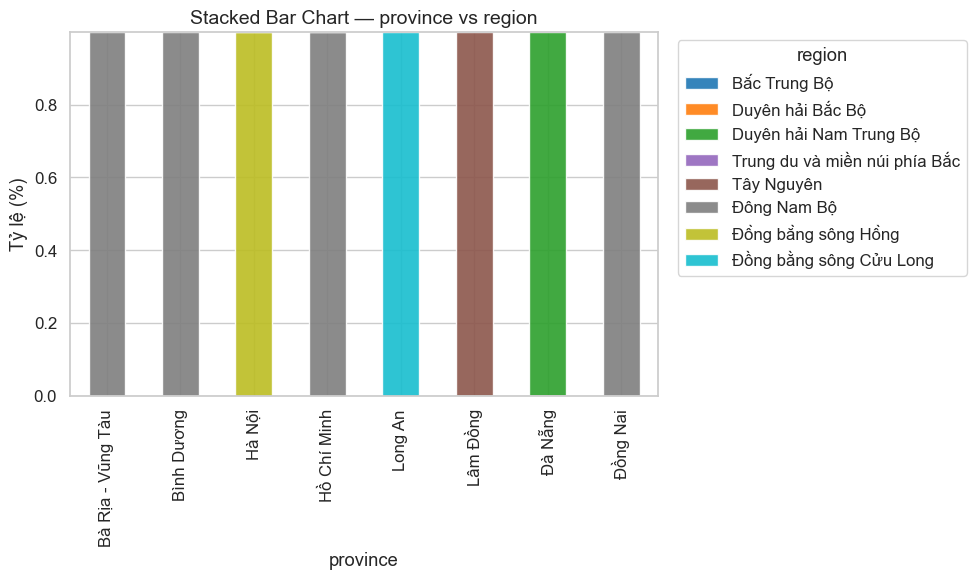

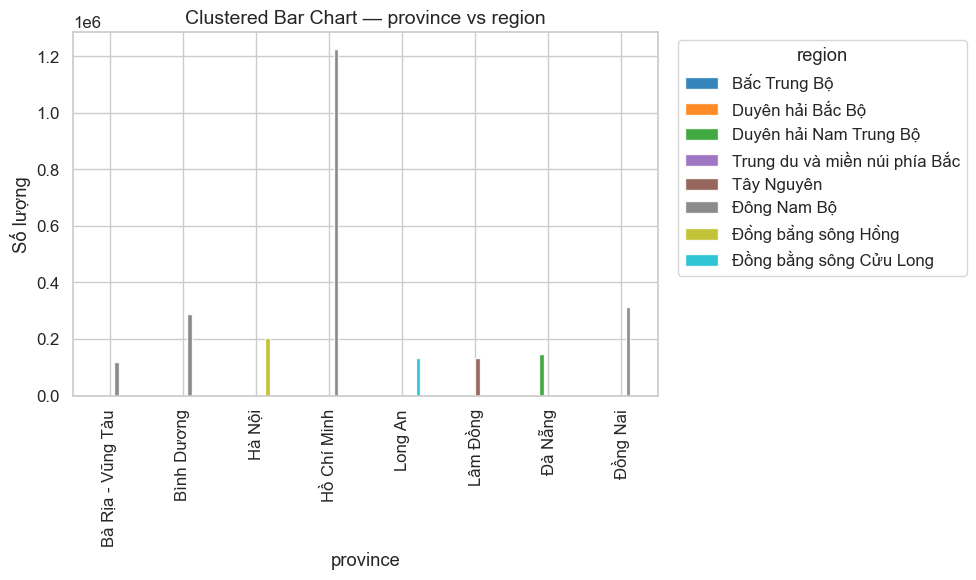


📊 Phân tích cặp (province, membership)
────────────────────────────
🔹 Bảng tần suất:
membership         Diamond   Gold  Standard
province                                   
Bà Rịa - Vũng Tàu     1733   7320    109163
Bình Dương            6635  20796    260426
Hà Nội                 311   3120    199448
Hồ Chí Minh          28373  83181   1112765
Long An               2894   8209    122793
Lâm Đồng              1885   7617    125156
Đà Nẵng               1427   7320    137953
Đồng Nai              6030  19176    287174

🔹 Chi-square = 15551.354, p = 0.0000e+00, dof = 14
➡️ Kết luận: Hai biến có mối liên hệ **có ý nghĩa thống kê**.


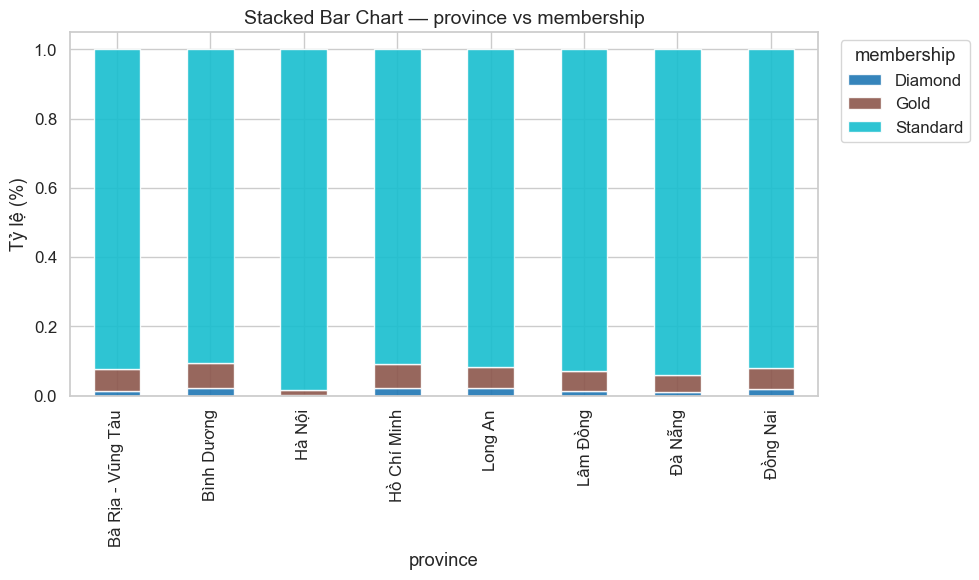

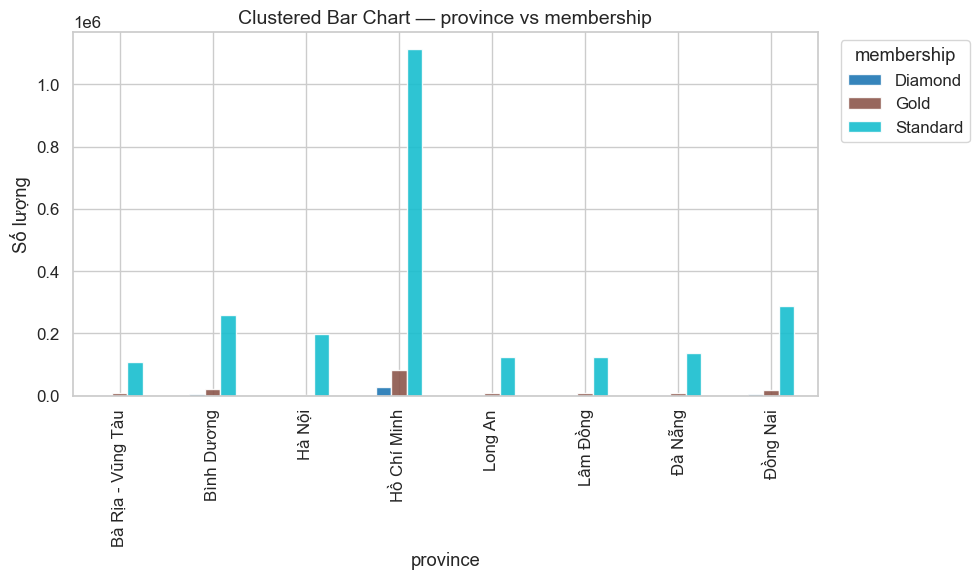


📊 Phân tích cặp (province, install_app)
────────────────────────────
🔹 Bảng tần suất:
install_app        Android  CRM Partner  Call  Chat  In-Store    SPE    Web  \
province                                                                      
Bà Rịa - Vũng Tàu      796          228   196    18    109608   4806    475   
Bình Dương            4247          689   477    52    260876  12242   1651   
Hà Nội                3946         2889  1877   341    112738  65007   4919   
Hồ Chí Minh          53910         2503  3861   287   1012054  87837  15678   
Long An               1436          311   137    19    124580   4876    494   
Lâm Đồng               867           79   219    14    126572   4074    478   
Đà Nẵng               3396          215   424    31    127630   8416   1028   
Đồng Nai              3838          606   257    46    288153  13022    928   

install_app          iOS  
province                  
Bà Rịa - Vũng Tàu   2089  
Bình Dương          7622  
Hà Nội        

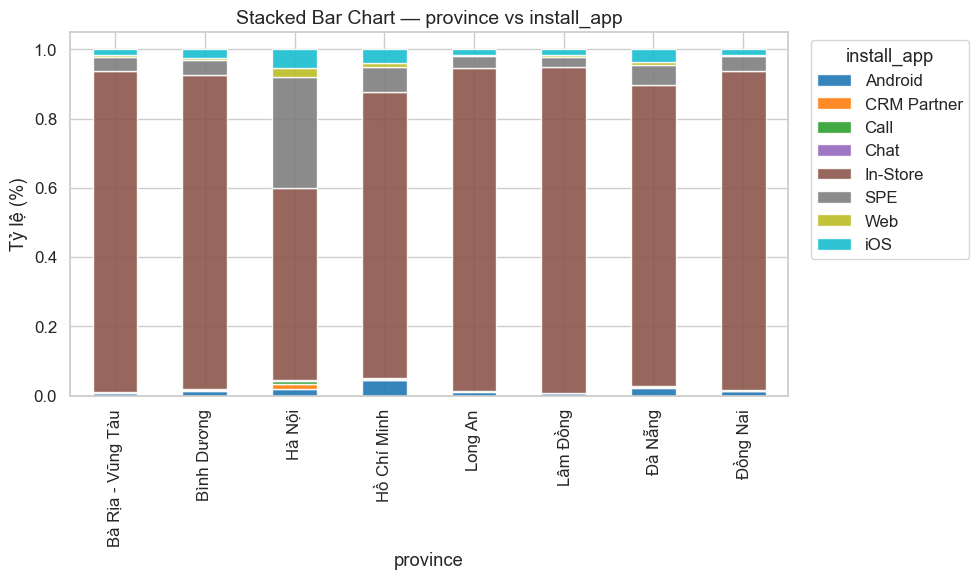

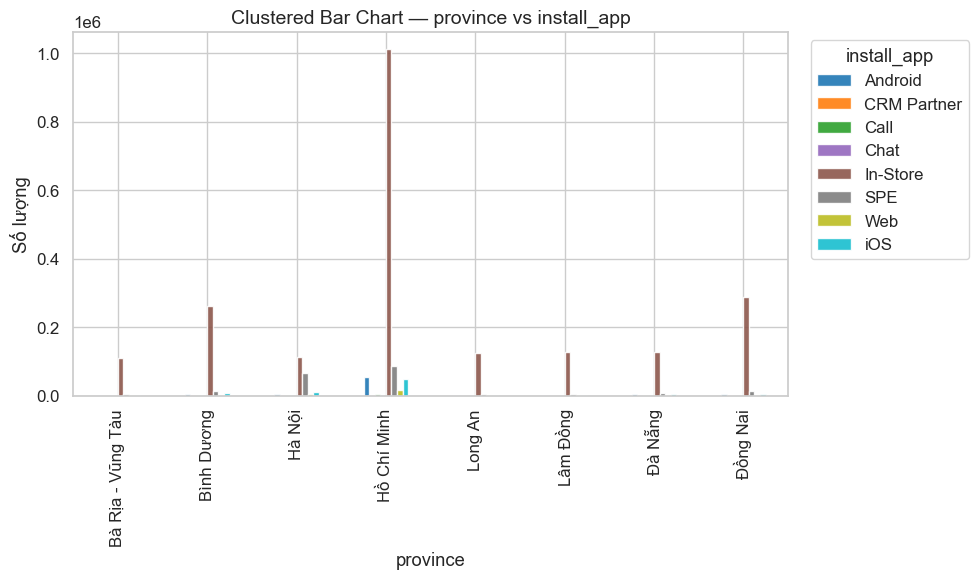


📊 Phân tích cặp (region, membership)
────────────────────────────
🔹 Bảng tần suất:
membership                     Diamond    Gold  Standard
region                                                  
Bắc Trung Bộ                     1351    8301    208217
Duyên hải Bắc Bộ                     6      97      4280
Duyên hải Nam Trung Bộ            7652   31531    538123
Trung du và miền núi phía Bắc      296    2338    102702
Tây Nguyên                        4228   17600    311635
Đông Nam Bộ                      46949  142275   1936842
Đồng bằng sông Hồng             776    6616    354179
Đồng bằng sông Cửu Long          14587   46415    786968

🔹 Chi-square = 31340.545, p = 0.0000e+00, dof = 14
➡️ Kết luận: Hai biến có mối liên hệ **có ý nghĩa thống kê**.


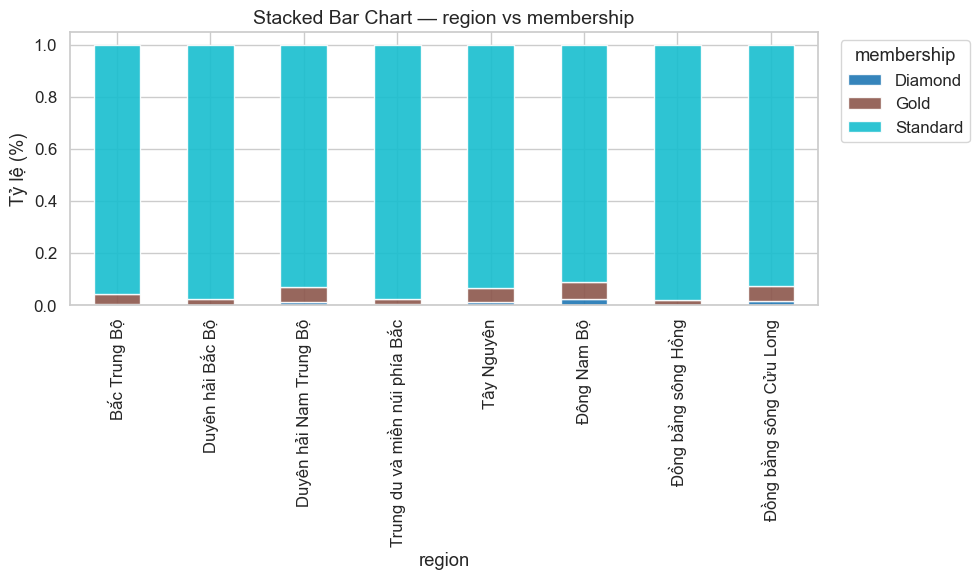

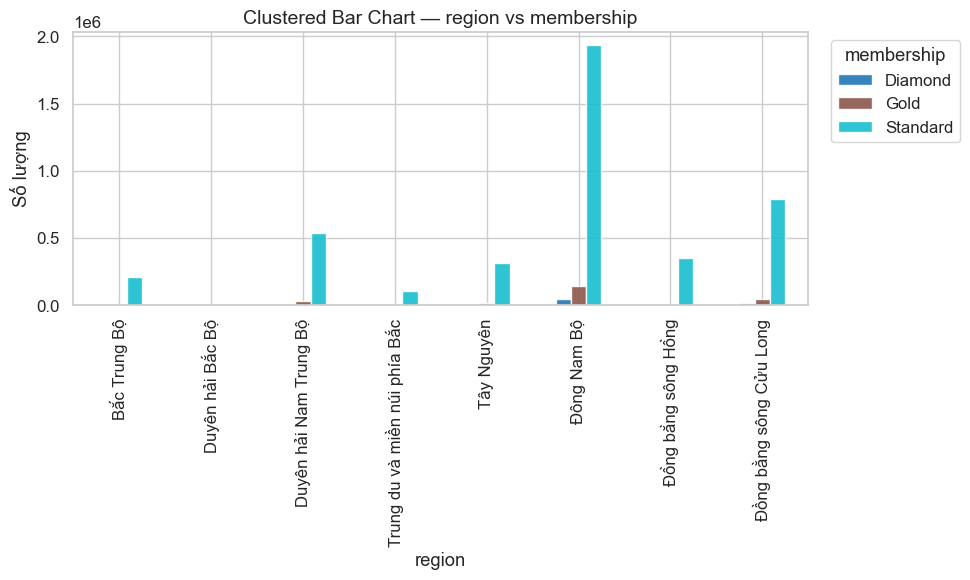


📊 Phân tích cặp (region, install_app)
────────────────────────────
🔹 Bảng tần suất:
install_app                    Android  CRM Partner  Call  Chat  In-Store  \
region                                                                      
Bắc Trung Bộ                     2435          699   546   182    183792   
Duyên hải Bắc Bộ                   146           66    38    11         0   
Duyên hải Nam Trung Bộ            7075         1665  1080   152    519726   
Trung du và miền núi phía Bắc      978          396   132    95     82670   
Tây Nguyên                        2654         1143   501    75    308377   
Đông Nam Bộ                      63825         4223  4906   437   1843602   
Đồng bằng sông Hồng            6091         4348  2334   538    224004   
Đồng bằng sông Cửu Long           8747         3452  1047   237    779829   

install_app                       SPE    Web    iOS  
region                                               
Bắc Trung Bộ                   2161

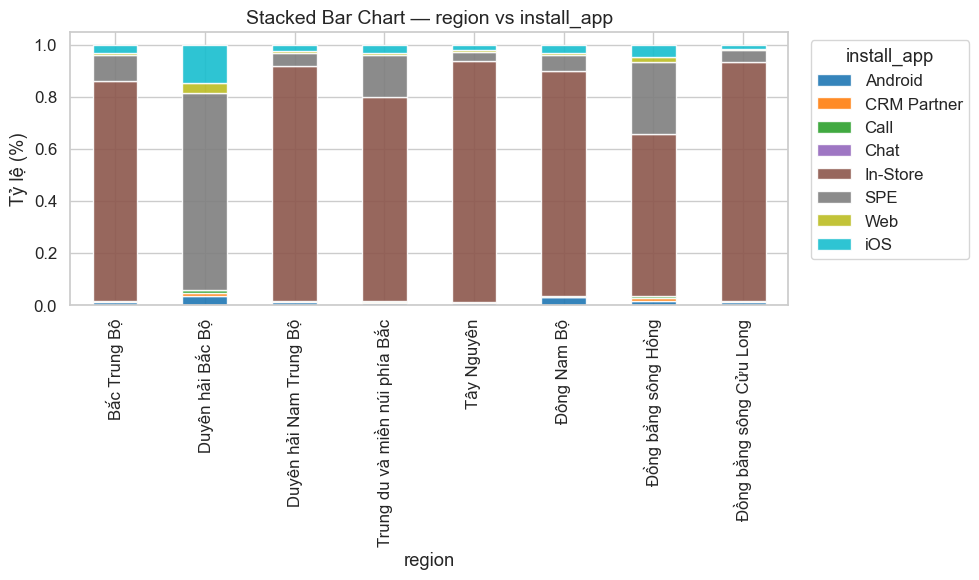

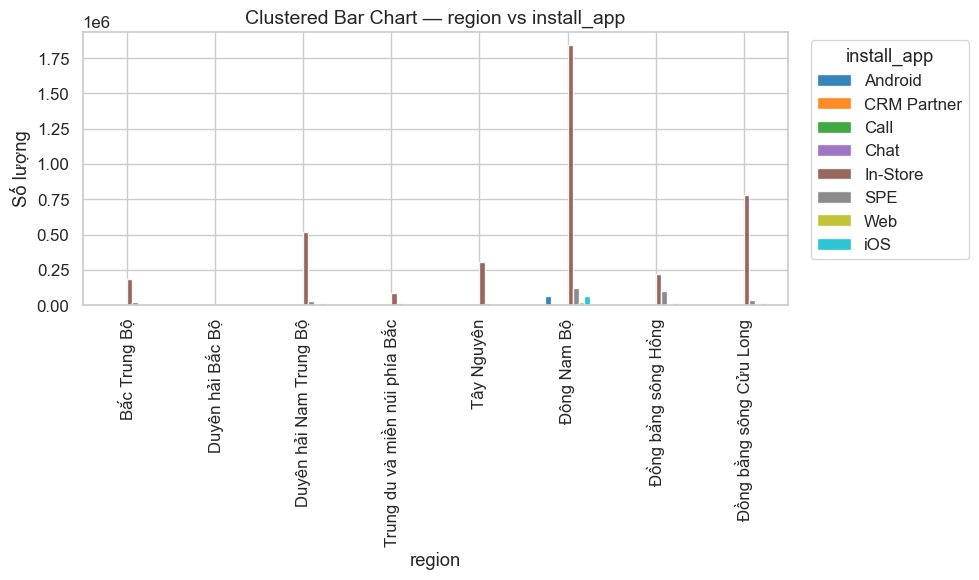


📊 Phân tích cặp (membership, install_app)
────────────────────────────
🔹 Bảng tần suất:
install_app  Android  CRM Partner  Call  Chat  In-Store     SPE    Web     iOS
membership                                                                    
Diamond         1879            0   202     3     64422    2205    224    6909
Gold            5889            6   605    15    214984   14264   1102   18305
Standard       84183        15986  9777  1709   3662594  331439  34550  102668

🔹 Chi-square = 36616.651, p = 0.0000e+00, dof = 14
➡️ Kết luận: Hai biến có mối liên hệ **có ý nghĩa thống kê**.


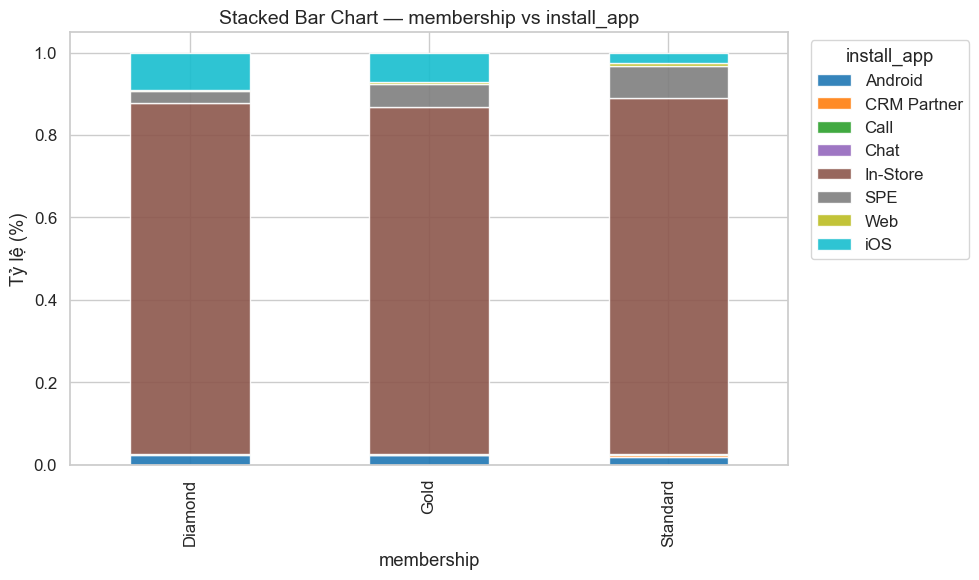

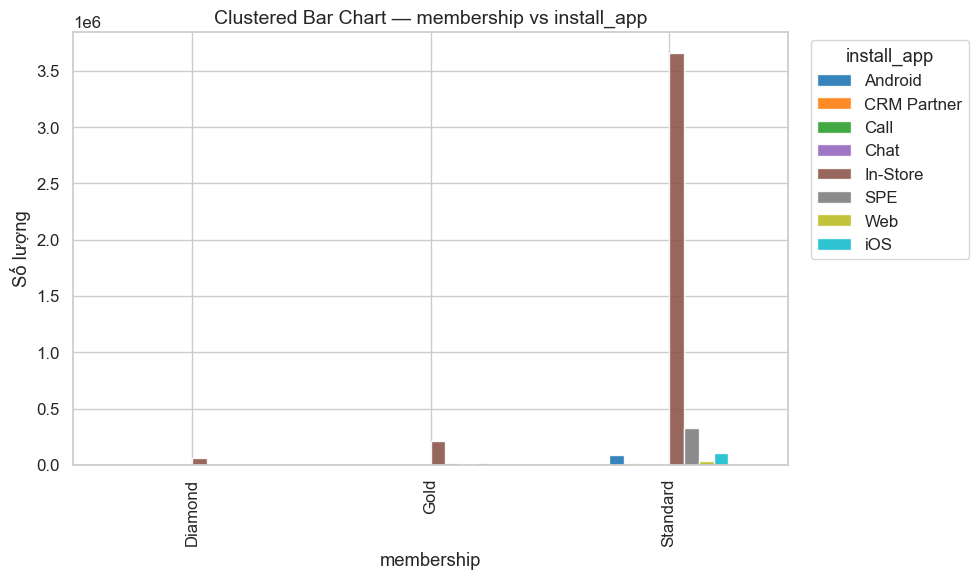

In [7]:
print("🔍 Thông tin ban đầu:")
print(df_purchase.shape)
print(df_purchase.columns)
print("\nSố lượng Null mỗi cột:")
print(df_purchase.null_count())


In [8]:
# Các cột cần giữ lại 
cols_to_keep_purchase = [
    'customer_id', 'user_id', 'item_id', 'created_date', 'price', 
    'timestamp', 'quantity', 'location', 'discount', 'channel', 'payment'
]

# Chọn các cột cần giữ
df_purchase = df_purchase.select(cols_to_keep_purchase)

print("Purchase Chunk DataFrame:")
df_purchase.head()


Purchase Chunk DataFrame:


customer_id,user_id,item_id,created_date,price,timestamp,quantity,location,discount,channel,payment
i32,str,str,datetime[μs],"decimal[38,4]",i64,i32,i32,"decimal[38,4]",str,str
5254214,"""ca12702ddf55acaa9fb767e10faaa6…","""7115000000004""",2024-12-24 18:17:01.027,49000.0000,1735064221,1,656,0.0000,"""In-Store""","""VietQR"""
7573232,"""54314ce86269f4849f9a4c3fc85d94…","""0029130000030""",2024-12-24 19:28:01.870,69000.0000,1735068481,1,143,0.0000,"""In-Store""","""Tiền mặt"""
8187418,"""4799de4022b58689b2b9fb37122479…","""3496000000053""",2024-12-24 19:50:43.760,75000.0000,1735069843,2,213,0.0000,"""In-Store""","""MoMo"""
8187418,"""4799de4022b58689b2b9fb37122479…","""2700000000002""",2024-12-24 19:49:39.223,58500.0000,1735069779,2,213,13000.0000,"""In-Store""","""MoMo"""
6931560,"""3b2423f730815273dfd6f6220b0c5c…","""0029110000036""",2024-12-28 09:49:33.780,89000.0000,1735379373,1,590,10000.0000,"""Android""","""MoMo"""


# Item chunk

| Cột                  | Giữ / Loại bỏ       | Lý do                                                                                                                                                    |
| -------------------- | ------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `item_id`            | ❌ Loại bỏ           | Mỗi giá trị đều duy nhất, chỉ mang tính định danh, không cung cấp thông tin thống kê; giữ lại chỉ khi cần join với bảng khác (`purchase`).               |
| `is_deleted`         | ❌ Loại bỏ           | Tất cả giá trị đều là `False` → không mang thông tin phân biệt.                                                                                          |
| `created_date`       | ✅ Giữ               | Cho biết thời điểm tạo sản phẩm, có thể dùng phân tích vòng đời sản phẩm, xác định hàng cũ / hàng mới.                                                   |
| `creation_timestamp` | ✅ Giữ               | Biểu diễn thời gian tạo ở dạng timestamp, có thể dùng phân tích xu hướng sản phẩm theo thời gian; nên chuyển sang dạng datetime để trực quan hóa dễ hơn. |
| `price`              | ✅ Giữ               | Biến chính trong phân tích lợi nhuận và định giá sản phẩm; có nhiều outlier nên cần trimming hoặc winsorizing trước khi phân tích.                       |
| `gp` (gross profit)  | ✅ Giữ               | Thể hiện lợi nhuận gộp, tương quan cao với `price` (r = 0.8867); có ý nghĩa kinh doanh mạnh, dùng để phân tích hiệu quả từng nhóm sản phẩm.              |
| `weight`             | ⚙️ Giữ có điều kiện | Có nhiều giá trị 0 hoặc “Không xác định”; có thể giữ lại nếu muốn phân tích theo khối lượng hoặc vận chuyển, nhưng cần chuẩn hóa đơn vị đo.              |
| `category_l1`        | ✅ Giữ               | Danh mục cấp 1 – hữu ích cho phân tích xu hướng ngành hàng lớn, nhưng cần xử lý mất cân đối khi huấn luyện mô hình.                                      |
| `category_l2`        | ✅ Giữ               | Danh mục cấp 2 – thể hiện rõ sự khác biệt trong khả năng tiêu thụ sản phẩm (`sale_status` khác nhau đáng kể giữa các nhóm).                              |
| `category_l3`        | ✅ Giữ               | Danh mục cấp 3 – phản ánh phân khúc chi tiết của sản phẩm; cần gộp nhóm các nhãn hiếm (rare categories) để giảm nhiễu khi mã hóa.                        |
| `brand`              | ⚙️ Giữ có điều kiện | Khoảng 70% giá trị bị thiếu hoặc “Không xác định”; có thể giữ nếu được làm sạch và gộp nhóm “Unknown”, nếu không thì nên loại bỏ do thiếu dữ liệu.       |
| `manufacturer`       | ❌ Loại bỏ           | Hơn 94% giá trị “Không xác định” → không mang thông tin hữu ích.                                                                                         |
| `gender_target`      | ⚙️ Giữ có điều kiện | 66% “Không xác định”, phần còn lại có thể hữu ích trong phân tích hành vi theo giới tính nếu được làm sạch.                                            |
| `age_group`          | ✅ Giữ               | Cung cấp thông tin độ tuổi mục tiêu (dù mất cân đối nhưng vẫn hữu ích để mô tả sản phẩm).                                                                |
| `sale_status`        | ✅ Giữ               | Phản ánh tình trạng bán (bán được / không bán được); có mối liên hệ rõ với `category_l2`, hữu ích cho phân tích sức tiêu thụ.                            |
| `p_id`               | ✅ Giữ               | Liên quan đến thế hệ mã hàng; giúp nhận diện vòng đời sản phẩm, đặc biệt trong phân tích hàng lỗi thời.                                                  |


In [9]:
# Các cột cần giữ lại
cols_to_keep_item = [
    'created_date', 'creation_timestamp', 'price', 'gp',
    'weight', 'category_l1', 'category_l2', 'category_l3',
    'brand', 'gender_target', 'age_group', 'sale_status', 'p_id'
]

# Chọn các cột cần giữ
df_item = df_item.select(cols_to_keep_item)

print("Item Chunk DataFrame:")
df_item.head()


Item Chunk DataFrame:


created_date,creation_timestamp,price,gp,weight,category_l1,category_l2,category_l3,brand,gender_target,age_group,sale_status,p_id
datetime[μs],i64,"decimal[38,4]","decimal[38,4]",f32,str,str,str,str,str,str,i32,i32
2012-04-04 09:25:44.240,1333531544,99000.0000,36828.0000,null,"""Babycare""","""Bình sữa, phụ kiện""","""Núm ty""","""Dr.Brown's""","""Không xác định""","""Không xác định""",0,17065
2017-08-18 08:50:50.713,1503046250,69000.0000,0.0000,null,"""Thời trang""","""Cơ cấu hàng cũ""","""Thời trang bé trai, bé gái cũ""","""Con Cưng""","""Bé Gái""","""Từ 3Y""",0,72370
2013-01-18 09:33:04.260,1358501584,45000.0000,14490.0000,null,"""Đồ chơi & Sách""","""0-1Y""","""Gặm nướu""","""Thương hiệu khác""","""Không xác định""","""Không xác định""",0,31154
2014-05-14 10:07:19.603,1400062039,401000.0000,59749.0000,null,"""Tã""","""Merries""","""Merries""","""Merries Nhật""","""Không xác định""","""Không xác định""",0,46123
2014-05-14 10:07:20.370,1400062040,401000.0000,65764.0000,null,"""Tã""","""Merries""","""Merries""","""Merries Nhật""","""Không xác định""","""Không xác định""",0,46127
